In [183]:
import pandas as pd
%pylab inline
import seaborn
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Load CSV file into memory

In [10]:
data = pd.read_csv('uber-raw-data-apr14.txt')

In [13]:
data.head

<bound method NDFrame.head of                  Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]>

In [15]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [51]:
data.tail

<bound method NDFrame.tail of                  Date/Time      Lat      Lon    Base
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]>

In [60]:
def get_dom(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)
data['weekday'] = data['Date/Time'].map(get_weekday)
data['dom'] = data['Date/Time'].map(get_dom)

In [61]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,hour,weekday
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,23,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,23,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,23,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,23,2
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,23,2


# analysis

## analyse the DoM

Text(0.5, 1.0, 'Frequency by Data of Month over April 2014')

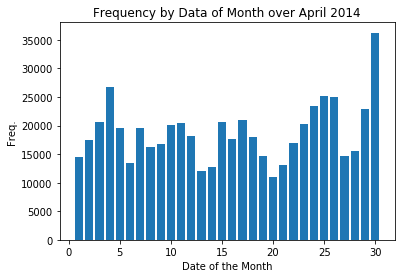

In [68]:
hist(data.dom, bins=30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the Month')
ylabel('Freq.')
title('Frequency by Data of Month over April 2014')

### another way of showing histogram is to go over every line of the DB in a for loop and group the results by the day of the month
### using len - that shows the total amount in a container. In this case, the container is our day of the month groups

In [69]:
for k, rows in data.groupby('dom'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


### This is the Python way of doing it. The Pandas way is:

In [72]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

### The above groups DOM data into chunks, then passes the chunks into the method. Then all the method does is just count how many elements in the chunk

<BarContainer object of 30 artists>

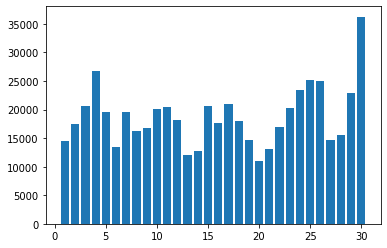

In [79]:
bar(range(1,31),by_date)

In [81]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

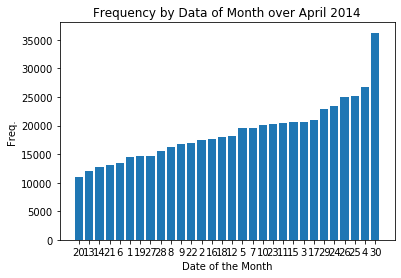

In [88]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of the Month')
ylabel('Freq.')
title('Frequency by Data of Month over April 2014')
;

### analyse the hour

''

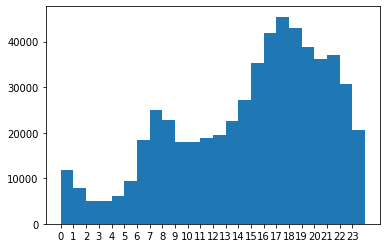

In [98]:
hist(data.hour, bins=24, range=(0,24))
xticks(range(0,24), data.hour.index)
;

### analyse the weekday

''

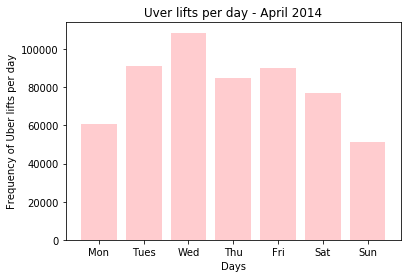

In [132]:
hist(data.weekday, bins=7, range=(-0.5,6.5), rwidth=.8, color='#FF0011', alpha=.2)
xticks(range(7),'Mon Tues Wed Thu Fri Sat Sun'.split())
xlabel('Days')
ylabel('Frequency of Uber lifts per day')
title('Uver lifts per day - April 2014')
;

### cross analysis (hour, dow)

In [145]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

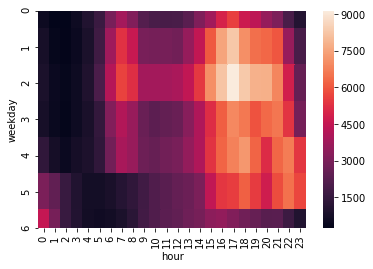

In [146]:
seaborn.heatmap(by_cross)

analysis of the above heatmap. Monday being 0 at the top. as the week goes on and towards the weekend, you get slightly later uber trips. On day 5 and 6 (Sat+Sun), you even get trips past midnight

Longitude + Latitude

''

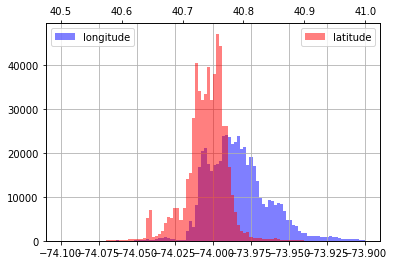

In [182]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9), color='blue', alpha=0.5, label='longitude')
grid()
legend(loc='upper left')

twiny()

hist(data['Lat'], bins=100, range=(40.5,41), color='red', alpha=0.5, label='latitude')
legend(loc='best')
;

(40.6, 41)

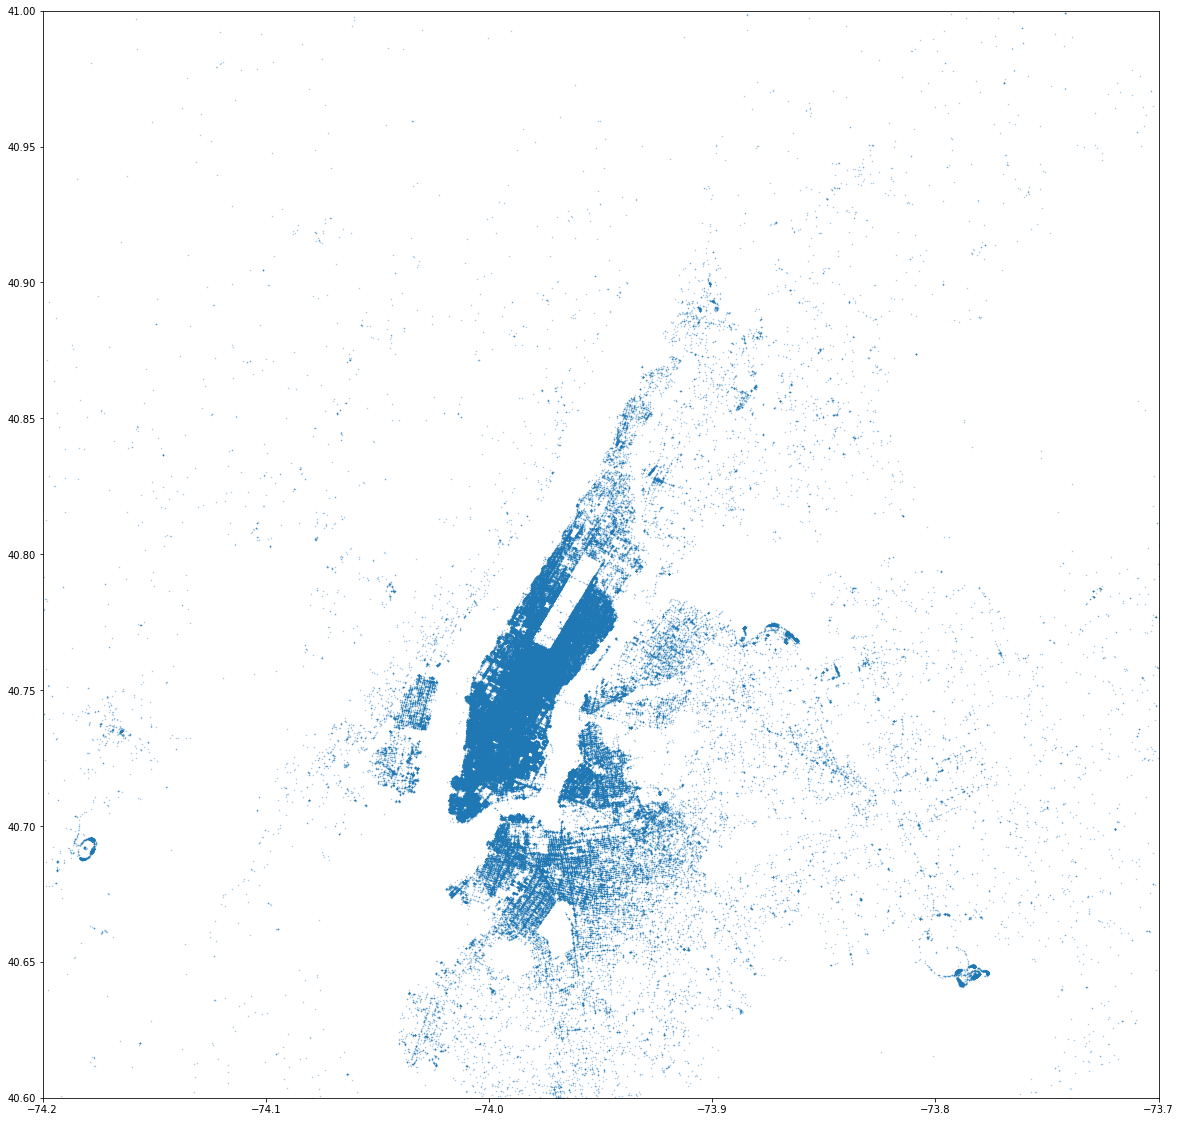

In [215]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=0.4)
xlim(-74.2, -73.7)
ylim(40.6, 41)